In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import csv
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import interp
from scipy import interpolate
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [5]:
dataset = pd.read_csv("data.csv")

In [6]:
from sklearn import preprocessing
import pandas as pd
dataset= pd.read_csv("data.csv")
dataset.head()

,3480,32673,397747,5462487,30879,286282,3449018,353157,3236730,4550541,...,20.06688963,25.4180602,24.41471572.2,0.49,0.203333333,0.306666667,27.090301,15.38461538.2,24.74916388,1.1
0,7175,97287,1716249,34136289,95015,1287808,22757626,1642907,22187280,31956173,...,23.262840,21.299094,23.867069,0.396682,0.336350,0.266968,25.981873,21.752266,19.033233,1
1,6871,91233,1600221,31679037,91177,1191126,20673692,1587329,20527392,31104283,...,23.088456,21.289355,22.938531,0.357784,0.414671,0.227545,23.688156,22.788606,17.691154,1
2,3183,28624,335612,4433830,27680,247228,2882104,311600,2768528,3946250,...,20.071685,24.372760,23.297491,0.346429,0.360714,0.292857,26.881720,24.731183,22.580645,1
3,2860,25432,293704,3814654,24851,223361,2597043,275629,2474713,3414863,...,24.632353,20.220588,19.117647,0.377289,0.380952,0.241758,25.367647,23.161765,19.852941,1
4,5429,66386,1057160,18992930,67911,827360,13142530,1114293,13508366,20478429,...,24.647887,20.598592,21.830986,0.434095,0.304042,0.261863,24.119718,21.126761,18.838028,1


In [7]:
random_state = np.random.RandomState(5)
inputSize = 195
outputCol = inputSize + 1
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./data.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []
shape_X=X.shape
shape_Y=Y.shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

The shape of X is: (634, 195)
The shape of Y is: (634, 1)


In [8]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True)
#classifier = BernoulliNB()
 #classifier = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
#clf = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=150)
#clf = RandomForestClassifier(n_estimators=3, oob_score=True, random_state=29, warm_start=False)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


Independent testing
training dataset 80%
(507, 195) (507, 1)
testing dataset 20%
(127, 195) (127, 1)

Independent training data set confusion matrix
['True Negative =', 77, 'False Positive =', 178, 'False Negative =', 42, 'True Positive =', 210, 'Accuracy =', 56.61]
['Accuracy =', 56.61, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 0.0]


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



Independent testing  data set confusion matrix
['True Negative =', 45, 'False Positive =', 17, 'False Negative =', 17, 'True Positive =', 48, 'Accuracy =', 73.23]
['Accuracy =', 73.23, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 0.0]


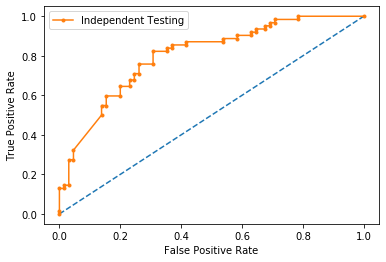

In [9]:
from sklearn.model_selection import train_test_split
print('\nIndependent testing')
# resultwriter.writerow(['\n\rindependent testing'])
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# train dataset
print("training dataset 80%")
print(X_train.shape, y_train.shape)
# test dataset
print("testing dataset 20%")
print(X_test.shape, y_test.shape)
# train the model
std_scale = StandardScaler().fit(X_train)
X_train = np.array(X_train, dtype='float32')
X_train = std_scale.transform(X_train)
# X_train = std_scale.transform(X_train)
# X_train = np.array(X_train,dtype='float32')
X_train = X_train[:, ~np.isnan(X_train).any(axis=0)]
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
#clf = RandomForestClassifier(n_estimators=25, max_depth=16, oob_score=True, n_jobs=-1, warm_start=True).fit(X_train, y_train.ravel())
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7, 2), random_state=3).fit(X_train, y_train.ravel()) 
#clf = SVC(kernel='linear', probability=True). fit(X_train, y_train.ravel())
pred = np.round(clf.predict(X_train)) #clf
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=np.round(tp/(tp+fn))
sp=np.round(tn/(tn+fp))
prec=np.round(tp/(tp+fp))
mcc=np.round((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print("\nIndependent training data set confusion matrix")
print(
    (['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp, 'Accuracy =', acc]))
print(
    (['Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc]))

# now test the model
std_scale = StandardScaler().fit(X_test)
X_test = std_scale.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_test)
X_test = pca.transform(X_test)
#clf = RandomForestClassifier(n_estimators=25, max_depth=12, oob_score=True, n_jobs=-1, warm_start=True).fit(X_test, y_test.ravel())
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7, 2), random_state=1).fit(X_test, y_test.ravel())
#clf = SVC(kernel='linear', probability=True).fit(X_test, y_test.ravel())
pred_test = np.round(clf.predict(X_test)) # clf
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred_test, labels=[1, 0]).ravel()
acc1 = np.round(((tn1 + tp1) / (tn1 + fp1 + fn1 + tp1)) * 100, 2)
sn1=np.round(tp1/(tp1+fn1))
sp1=np.round(tn/(tn1+fp1))
prec1=np.round(tp1/(tp1+fp1))
mcc1=np.round((tp1*tn1-fp1*fn1)/(math.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fn1)*(tn1+fn1))))
print("\nIndependent testing  data set confusion matrix")
print((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =', tp1, 'Accuracy =',
        acc1]))
print(
    (['Accuracy =', acc1, 'Sensitivity =', sn1, 'Precession =', prec1, 'MCC =', mcc1]))
with open('./result2.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Independent testing'])
    resultwriter.writerow(['training dataset 70%'])
    resultwriter.writerow([X_train.shape, y_train.shape])
    resultwriter.writerow(['testing dataset 30%'])
    resultwriter.writerow([X_test.shape, y_test.shape])
    resultwriter.writerow(["training data set confusion matrix"])
    resultwriter.writerow((
                          ['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp,
                           'Accuracy =', acc]))
    resultwriter.writerow((['testing  data set confusion matrix']))
    resultwriter.writerow((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =',
                            tp1, 'Accuracy =', acc1]))
from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(y_test))]
lr_probs1 = clf.predict_proba(X_test) #clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _ = roc_curve(y_test, ns_probs1)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='Independent Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




10-fold Cross Validation

Fold : 1


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[28, 4, 1, 31, 'Accuracy =', 92.19, 'Sensitivity =', 0.96875, 'Precession =', 0.8857142857142857, 'MCC =', 0.8902392400559621]

Final 10CV Score =  9.22

Fold : 2


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[29, 3, 0, 32, 'Accuracy =', 95.31, 'Sensitivity =', 1.0, 'Precession =', 0.9142857142857143, 'MCC =', 0.9561828874675149]

Final 10CV Score =  18.75

Fold : 3


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[29, 3, 1, 31, 'Accuracy =', 93.75, 'Sensitivity =', 0.96875, 'Precession =', 0.9117647058823529, 'MCC =', 0.9054663334689764]

Final 10CV Score =  28.12

Fold : 4


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[30, 2, 3, 29, 'Accuracy =', 92.19, 'Sensitivity =', 0.90625, 'Precession =', 0.9354838709677419, 'MCC =', 0.8312735585467015]

Final 10CV Score =  37.34

Fold : 5


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[31, 1, 1, 30, 'Accuracy =', 96.83, 'Sensitivity =', 0.967741935483871, 'Precession =', 0.967741935483871, 'MCC =', 0.936491935483871]

Final 10CV Score =  47.03

Fold : 6


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[31, 1, 1, 30, 'Accuracy =', 96.83, 'Sensitivity =', 0.967741935483871, 'Precession =', 0.967741935483871, 'MCC =', 0.936491935483871]

Final 10CV Score =  56.71

Fold : 7


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[30, 2, 1, 30, 'Accuracy =', 95.24, 'Sensitivity =', 0.967741935483871, 'Precession =', 0.9375, 'MCC =', 0.919726726178799]

Final 10CV Score =  66.23

Fold : 8


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[30, 1, 1, 31, 'Accuracy =', 96.83, 'Sensitivity =', 0.96875, 'Precession =', 0.96875, 'MCC =', 0.936491935483871]

Final 10CV Score =  75.92

Fold : 9


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[29, 2, 0, 32, 'Accuracy =', 96.83, 'Sensitivity =', 1.0, 'Precession =', 0.9411764705882353, 'MCC =', 0.9701425001453319]

Final 10CV Score =  85.6

Fold : 10


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[30, 1, 1, 31, 'Accuracy =', 96.83, 'Sensitivity =', 0.96875, 'Precession =', 0.96875, 'MCC =', 0.936491935483871]

Final 10CV Score =  95.28


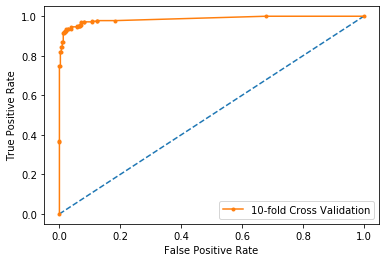

In [10]:
print('\n10-fold Cross Validation')
self_scores = []
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
self_scores.append([tn, fp, fn, tp, acc])
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
iterator = 1
cv_score = 0
for train, test in kfold.split(X, Y):
    print('\nFold : ' + str(iterator))
    #clf = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
    #clf= SVC(kernel='linear', probability=True).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test])) # clf
    tn, fp, fn, tp = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sn=(tp/(tp+fn))
    sp=(tn/(tn+fp))
    prec=(tp/(tp+fp))
    mcc=((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
    cvscores.append([tn, fp, fn, tp, acc, sn, sp, prec, mcc])
    iterator = iterator + 1
    print([tn, fp, fn, tp, 'Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc])
    cv_score = cv_score + acc
    print('\n\rFinal 10CV Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result1.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Self-Consistency'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive', 'Accuracy'])
    resultwriter.writerow(self_scores)
    resultwriter.writerow(['\n10-fold Cross Validation'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive', 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final 10CV Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)# clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
# calculate roc curves
ns_fpr2, ns_tpr2, _ = roc_curve(Y, ns_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='10-fold Cross Validation')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Self Consistency


Self-Consistency


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[297, 20, 10, 307, 95.27, 0.9684542586750788, 'Accuracy =', 95.27, 'specificity=', 0.9369085173501577, 'Sensitivity =', 0.9684542586750788, 'Precession =', 0.9388379204892966, 'MCC =', 0.920448037374424]


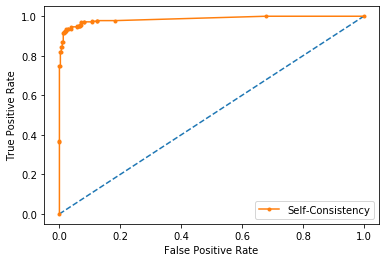

95.27

In [11]:
import matplotlib.pyplot as pyplot
print('\nSelf-Consistency')
#clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
#clf= SVC(kernel='linear', probability=True).fit(X, Y.ravel())
pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=(tp/(tp+fn))
sp=(tn/(tn+fp))
prec=(tp/(tp+fp))
mcc=((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print([tn, fp, fn, tp, acc, sn, 'Accuracy =', acc, 'specificity=', sp, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc ])
ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X) # clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
ns_fpr1, ns_tpr1, _ = roc_curve(Y, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
acc

# Jacknife testing


Jacknife testing

Jacknife : 1


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[29, 3, 0, 0, 'Accuracy =', 90.62, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 2


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[32, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 3


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[28, 4, 0, 0, 'Accuracy =', 87.5, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 4


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[30, 2, 0, 0, 'Accuracy =', 93.75, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 5


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[31, 1, 0, 0, 'Accuracy =', 96.88, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 6


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[29, 3, 0, 0, 'Accuracy =', 90.62, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 7


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[31, 1, 0, 0, 'Accuracy =', 96.88, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 8


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[30, 2, 0, 0, 'Accuracy =', 93.75, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 9


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[29, 3, 0, 0, 'Accuracy =', 90.62, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 10


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[28, 1, 0, 3, 'Accuracy =', 96.88, 'Sensitivity =', 1.0, 'specificity=', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Jacknife : 11


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 3, 29, 'Accuracy =', 90.62, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 12


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 2, 30, 'Accuracy =', 93.75, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 13


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 2, 30, 'Accuracy =', 93.75, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 14


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 32, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 15


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 30, 'Accuracy =', 96.77, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 16


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 31, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 17


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 30, 'Accuracy =', 96.77, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 18


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 31, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 19


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 30, 'Accuracy =', 96.77, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 20
[0, 0, 0, 31, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Final Jacknife Score =  95.3


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


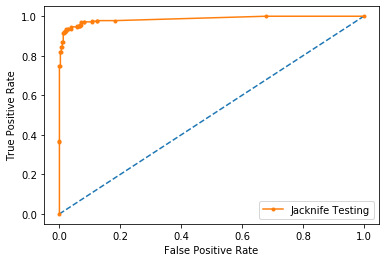

ValueError: Found input variables with inconsistent numbers of samples: [127, 634]

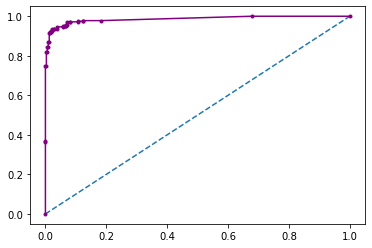

In [12]:
kfold = KFold(n_splits=20, shuffle=False)  # Removed Stratified Keyword for JackKnife
cvscores = []
iterator = 1
cv_score = 0

# Normalization
std_scale = StandardScaler().fit(X)
X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
# pca = decomposition.PCA(n_components=2)
# pca.fit(X)
# X = pca.transform(X)
print('\nJacknife testing')
for train, test in kfold.split(X, Y):
    print('\nJacknife : ' + str(iterator))
    #clf = RandomForestClassifier(n_estimators=30, max_depth=25, oob_score=True, n_jobs=-1, warm_start=False).fit(X, Y.ravel())
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
    #clf= SVC(kernel='linear', probability=True).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test]))
    tn2, fp2, fn2, tp2 = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc2 = np.round(((tn2 + tp2)/ (tn2 + fp2 + fn2 + tp2)) * 100, 2)
    sn2=np.round(tp2/(tp2+fn2))
    sp2=np.round(tn2/(tn2+fp2))
    prec2=np.round(tp2/(tp2+fp2))
    mcc2=np.round((tp2*tn2-fp2*fn2)/(math.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fn2)*(tn2+fn2))))
    cvscores.append([tn2, fp2, fn2, tp2, acc2, sn2, sp2, prec2, mcc2])
    iterator = iterator + 1
    print([tn2, fp2, fn2, tp2, 'Accuracy =', acc2, 'Sensitivity =', sn2, 'specificity=', sp2, 'Precession =', prec2, 'MCC =', mcc2])
    cv_score = cv_score + acc2
print('\n\rFinal Jacknife Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result3.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['\nJacknife'])
    resultwriter.writerow(['True Negative' 'False Positive' 'False Negative' 'True Positive' 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final Jacknife Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)#clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _ = roc_curve(Y, ns_probs1)
lr_fpr4, lr_tpr4, _ = roc_curve(Y, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='Jacknife Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--', )
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='purple', label='Self-Consistency')

# plot the roc curve for the model
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs1) # this is needed to be check as I suppose to be true but needed verification
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', color='Blue')
pyplot.plot(lr_fpr2, lr_tpr2, linestyle='-', color='Green', label='10-fold Cross Validation')

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='Cyan', label='Independent Testing')

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='yellow', label='Jacknife Testing')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()